# Analysis of EV sales according to some main countries.

In [68]:
import warnings
warnings.filterwarnings("ignore")

In [69]:
pip install IPython

Note: you may need to restart the kernel to use updated packages.


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)

In [71]:
# Different Color Sets
colour1=['#A8E6CE','#DCEDC2','#FFD3B5','#FFAAA6','#FF8C94']

In [72]:
#Importing CSV file
hd=pd.read_csv("C:\\Users\\NEW\\AIF BlackRock Practice\\EV Sales Trend Data Analysis Project\\Historical_EV_Sales_Data.csv")

# Data Cleaning 

In [73]:
hd.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49
1,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170
2,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80
3,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100
4,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190


In [74]:
pd.isnull(hd)

,region,category,parameter,mode,powertrain,year,unit,value
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
829,False,False,False,False,False,False,False,False
830,False,False,False,False,False,False,False,False
831,False,False,False,False,False,False,False,False
832,False,False,False,False,False,False,False,False


In [75]:
hd.isna().sum()

region        0
category      0
parameter     0
mode          0
powertrain    0
year          0
unit          0
value         0
dtype: int64

In [76]:
hd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 834 entries, 0 to 833
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   region      834 non-null    object
 1   category    834 non-null    object
 2   parameter   834 non-null    object
 3   mode        834 non-null    object
 4   powertrain  834 non-null    object
 5   year        834 non-null    int64 
 6   unit        834 non-null    object
 7   value       834 non-null    int64 
dtypes: int64(2), object(6)
memory usage: 52.2+ KB


In [77]:
hd.shape

(834, 8)

In [78]:
hd.describe()

,year,value
count,834.000000,8.340000e+02
mean,2016.579137,8.141432e+04
std,3.511476,4.072362e+05
min,2010.000000,1.000000e+00
25%,2014.000000,3.400000e+02
50%,2017.000000,3.100000e+03
75%,2020.000000,2.300000e+04
max,2022.000000,7.300000e+06


In [79]:
country=pd.unique(hd.region)

In [80]:
country

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'China', 'Denmark', 'EU27', 'Europe', 'Finland', 'France',
       'Germany', 'Greece', 'Iceland', 'India', 'Israel', 'Italy',
       'Japan', 'Korea', 'Mexico', 'Netherlands', 'New Zealand', 'Norway',
       'Other Europe', 'Poland', 'Portugal', 'Rest of the world',
       'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkiye',
       'United Kingdom', 'USA', 'World'], dtype=object)

In [81]:
# Create a sample data frame
data = {'region': hd.region,
        'year': hd.year,
        'value': hd.value}
df = pd.DataFrame(data)
print(df)


        region  year    value
0    Australia  2011       49
1    Australia  2012      170
2    Australia  2012       80
3    Australia  2013      100
4    Australia  2013      190
..         ...   ...      ...
829      World  2020   970000
830      World  2021  1900000
831      World  2021  4600000
832      World  2022  7300000
833      World  2022  2900000

[834 rows x 3 columns]


# Analyzing EV sales in India between 2010-2022

In [82]:
# Filter the data to only include entries for India
india_data = df[df['region'] == 'India']

# Group the data by year and sum the units column for each year
india_data = india_data.groupby('year')['value'].sum()

# Create a new data frame with the aggregated data
india_df = pd.DataFrame({'year': india_data.index, 'value': india_data.values})

# Print the new data frame
print(india_df)

    year  value
0   2010    450
1   2011   1400
2   2012    190
3   2013    410
4   2014   1000
5   2015    450
6   2016    730
7   2017    920
8   2018    920
9   2019    687
10  2020   3143
11  2021  12050
12  2022  48023


In [83]:
change=india_df['value'].pct_change()*100
print(change)
india_df["%_change"] = change
india_df


0            NaN
1     211.111111
2     -86.428571
3     115.789474
4     143.902439
5     -55.000000
6      62.222222
7      26.027397
8       0.000000
9     -25.326087
10    357.496361
11    283.391664
12    298.531120
Name: value, dtype: float64


,year,value,%_change
0,2010,450,NaN
1,2011,1400,211.111111
2,2012,190,-86.428571
3,2013,410,115.789474
4,2014,1000,143.902439
5,2015,450,-55.000000
6,2016,730,62.222222
7,2017,920,26.027397
8,2018,920,0.000000
9,2019,687,-25.326087


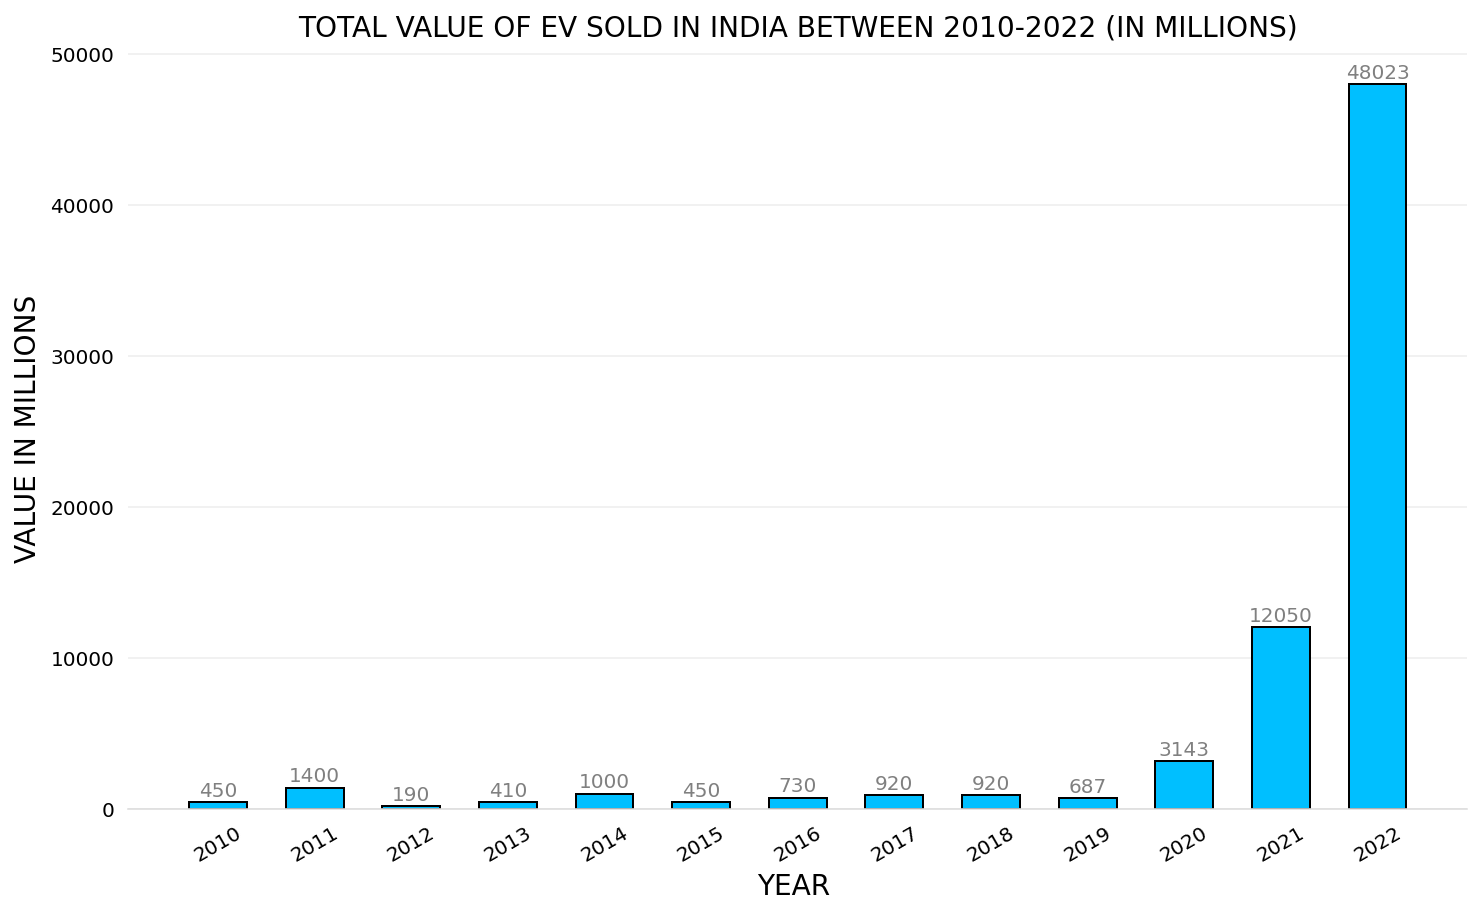

In [84]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.rc('font', family='Open Sans')
fig, ax = plt.subplots()
def autolabel(rectangle_group): # function for display bar heights which is annotation
    for rect in rectangle_group:
        height=rect.get_height()
        ax.annotate(str(height), # to get the height of bar or basically values of y-axis.
                    xy=(rect.get_x()+rect.get_width()/2,height), # to get the x and y coordinates to print text.
                    ha='center', # to align the text at center of the bar
                    xytext=(0,3), # to put a space between bar and text, 0 is x axis and y is the distance btw bar and text.
                    textcoords='offset points', # text will not be shown without it.
                    color='grey')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
rect=ax.bar(
    x=india_df.year,width=0.6,color='deepskyblue',edgecolor='black',
    height=india_df.value,
    tick_label=india_df.year
)
autolabel(rect)
plt.xticks(rotation=30)
plt.xlabel("YEAR ",fontsize=14)
plt.ylabel("VALUE IN MILLIONS",fontsize=14)
plt.title("TOTAL VALUE OF EV SOLD IN INDIA BETWEEN 2010-2022 (IN MILLIONS)",fontsize=14)
plt.show()


# Conclusion: EV sales have picked the pace in the past 2-3 years.

<Figure size 1800x1368 with 0 Axes>

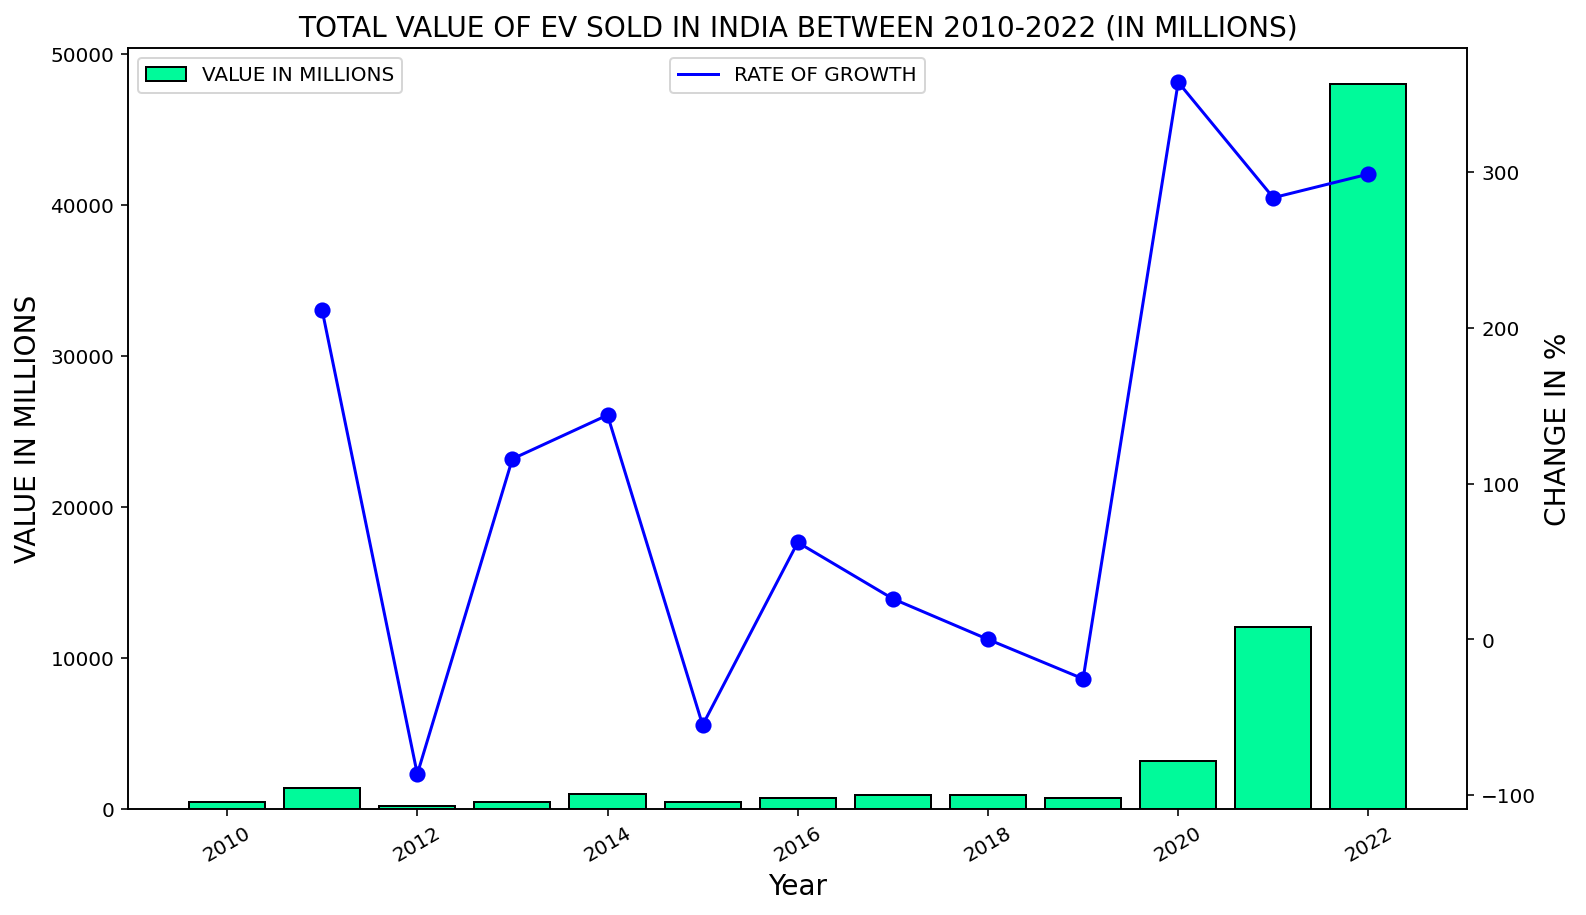

In [85]:
# Create figure and axis #1

fig=plt.figure(figsize = (25, 19))
fig, ax1 = plt.subplots()
# plot bar chart on axis #1
ax1.bar(india_df.year,india_df.value,label='VALUE IN MILLIONS', color='mediumspringgreen',edgecolor='black')
ax1.grid(False) # turn off grid #2
ax1.set_xlabel('Year',fontsize=14)
plt.xticks(rotation=30)
ax1.set_ylabel('VALUE IN MILLIONS',fontsize=14)
ax1.legend(loc='upper left')
plt.title("TOTAL VALUE OF EV SOLD IN INDIA BETWEEN 2010-2022 (IN MILLIONS)",fontsize=14)

# set up the 2nd axis
ax2 = ax1.twinx()
# plot line chart on axis #2
ax2.plot(india_df.year,india_df['%_change'],color='blue',label='RATE OF GROWTH') 
ax2.set_ylabel('CHANGE IN %',fontsize=14)
plt.scatter(india_df.year,india_df['%_change'], c='blue', s=50)
ax2.legend(loc='upper center')
plt.show()

# Conclusion: EV sales remain constant between 2010-2019 but in the past 3 years it registers a growth rate of more than 280% per year in India.

In [86]:
!pip install pyecharts

In [87]:
!pip install wget

# Analyzing ev sales data for USA 

In [88]:
# Filter the data to only include entries for USA
usa_data = df[df['region'] == 'USA']

# Group the data by year and sum the units column for each year
usa_data = usa_data.groupby('year')['value'].sum()

# Create a new data frame with the aggregated data
usa_df = pd.DataFrame({'year': usa_data.index, 'value': usa_data.values})

# Print the new data frame
print(usa_df)
change=usa_df['value'].pct_change()*100
print(change)
usa_df["%_change"] = change
usa_df

    year   value
0   2010    1200
1   2011   17800
2   2012   54000
3   2013   97000
4   2014  118000
5   2015  114000
6   2016  160000
7   2017  194000
8   2018  360000
9   2019  325000
10  2020  294000
11  2021  630000
12  2022  990000
0             NaN
1     1383.333333
2      203.370787
3       79.629630
4       21.649485
5       -3.389831
6       40.350877
7       21.250000
8       85.567010
9       -9.722222
10      -9.538462
11     114.285714
12      57.142857
Name: value, dtype: float64


,year,value,%_change
0,2010,1200,NaN
1,2011,17800,1383.333333
2,2012,54000,203.370787
3,2013,97000,79.629630
4,2014,118000,21.649485
5,2015,114000,-3.389831
6,2016,160000,40.350877
7,2017,194000,21.250000
8,2018,360000,85.567010
9,2019,325000,-9.722222


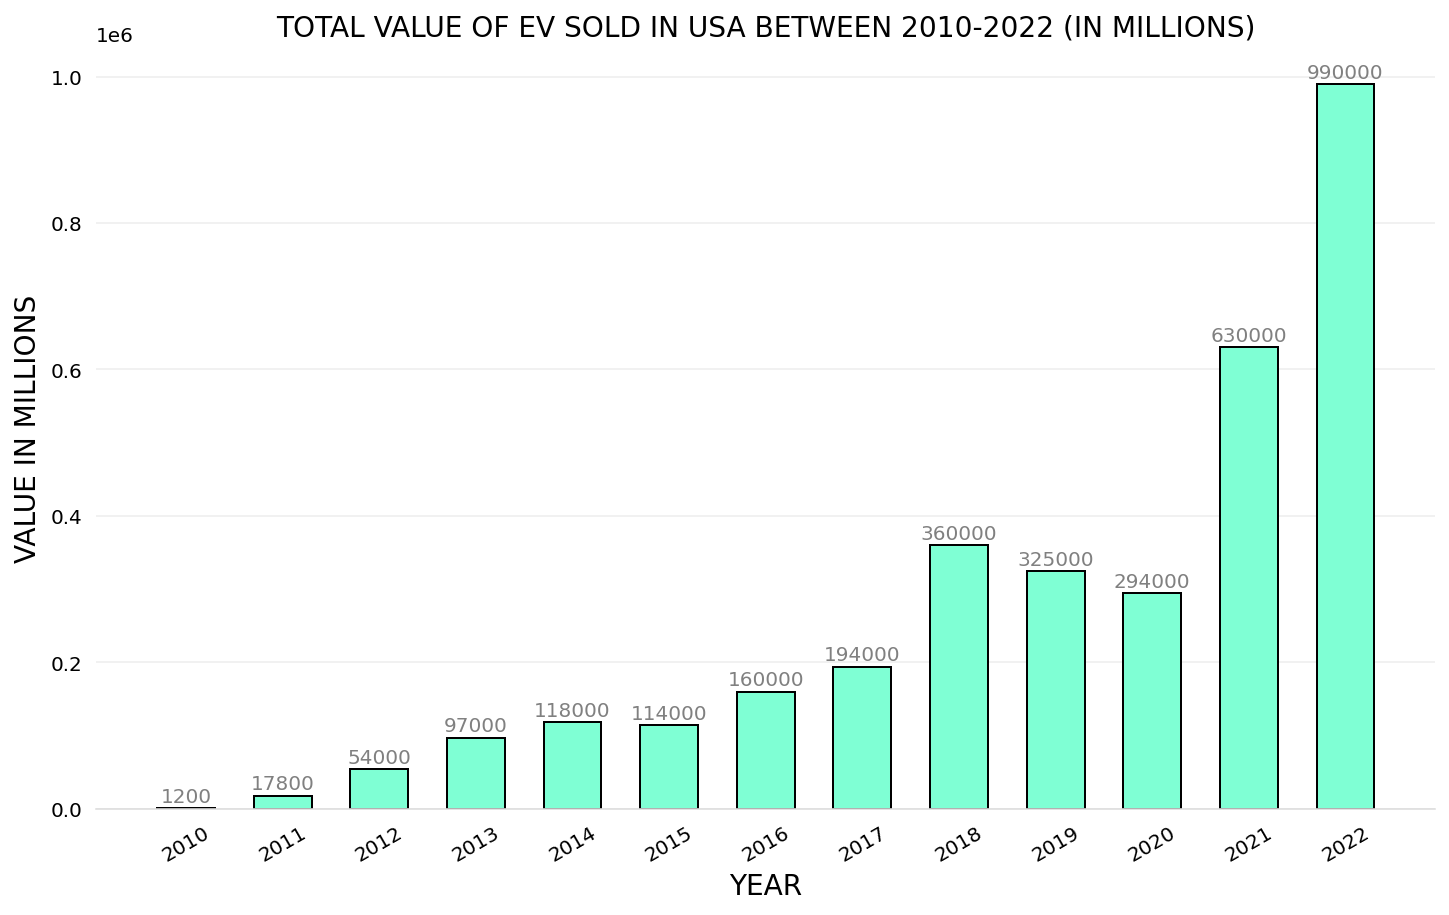

In [89]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.rc('font', family='Open Sans')
fig, ax = plt.subplots()
def autolabel(rectangle_group): # function for display bar heights which is annotation
    for rect in rectangle_group:
        height=rect.get_height()
        ax.annotate(str(height), # to get the height of bar or basically values of y-axis.
                    xy=(rect.get_x()+rect.get_width()/2,height), # to get the x and y coordinates to print text.
                    ha='center', # to align the text at center of the bar
                    xytext=(0,3), # to put a space between bar and text, 0 is x axis and y is the distance btw bar and text.
                    textcoords='offset points', # text will not be shown without it.
                    color='grey')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
rect=ax.bar(
    x=usa_df.year,width=0.6,color='aquamarine',edgecolor='black',
    height=usa_df.value,
    tick_label=usa_df.year
)
autolabel(rect)
plt.xlabel("YEAR",fontsize=14)
plt.xticks(rotation=30)
plt.ylabel("VALUE IN MILLIONS",fontsize=14)
plt.title("TOTAL VALUE OF EV SOLD IN USA BETWEEN 2010-2022 (IN MILLIONS)",fontsize=14)
plt.show()
fig.tight_layout()

# Conclusion: EV sales in USA grew gradually over the past decade.

In [90]:
# Filter the data to only include entries for Australia
australia_data = df[df['region'] == 'Australia']

# Group the data by year and sum the units column for each year
australia_data = australia_data.groupby('year')['value'].sum()

# Create a new data frame with the aggregated data
australia_df = pd.DataFrame({'year': australia_data.index, 'value': australia_data.values})
change=australia_df['value'].pct_change()*100
australia_df["%_change"] = change
australia_df

,year,value,%_change
0,2011,49,NaN
1,2012,250,410.204082
2,2013,290,16.000000
3,2014,1320,355.172414
4,2015,1760,33.333333
5,2016,1370,-22.159091
6,2017,2300,67.883212
7,2018,3600,56.521739
8,2019,9200,155.555556
9,2020,6900,-25.000000


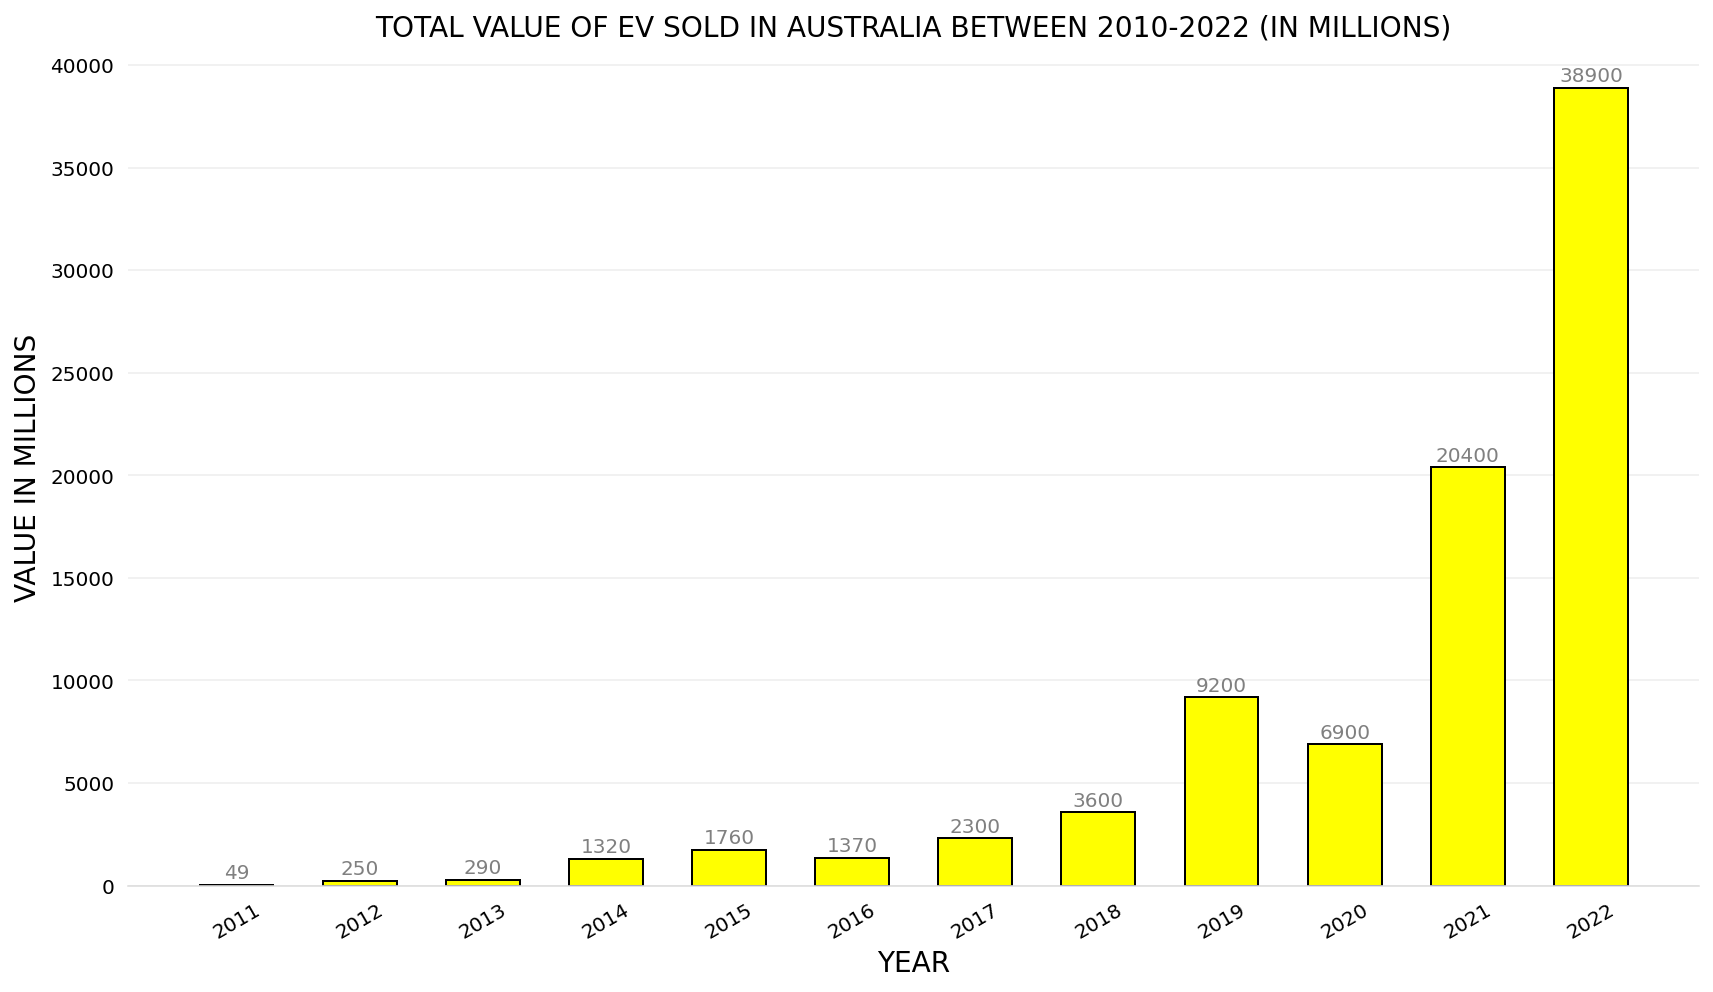

In [91]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.rc('font', family='Open Sans')
fig, ax = plt.subplots()
def autolabel(rectangle_group): # function for display bar heights which is annotation
    for rect in rectangle_group:
        height=rect.get_height()
        ax.annotate(str(height), # to get the height of bar or basically values of y-axis.
                    xy=(rect.get_x()+rect.get_width()/2,height), # to get the x and y coordinates to print text.
                    ha='center', # to align the text at center of the bar
                    xytext=(0,3), # to put a space between bar and text, 0 is x axis and y is the distance btw bar and text.
                    textcoords='offset points', # text will not be shown without it.
                    color='grey')
rect=ax.bar(
    x=australia_df.year,width=0.6,color='yellow',edgecolor='black',
    height=australia_df.value,
    tick_label=australia_df.year
)
autolabel(rect)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
plt.xlabel("YEAR",fontsize=14)
plt.xticks(rotation=30)
tick_label=australia_df.year
plt.ylabel("VALUE IN MILLIONS",fontsize=14)
plt.title("TOTAL VALUE OF EV SOLD IN AUSTRALIA BETWEEN 2010-2022 (IN MILLIONS)",fontsize=14)

fig.tight_layout()


# Conclusion: EV sales data over the past 3-4 years shows that australian EV market is picking up pace.

# EV sales analyzes of China

In [92]:
# Filter the data to only include entries for China
china_data = df[df['region'] == 'China']

# Group the data by year and sum the units column for each year
china_data = china_data.groupby('year')['value'].sum()

# Create a new data frame with the aggregated data
china_df = pd.DataFrame({'year': china_data.index, 'value': china_data.values})

# Print the new data frame
print(china_df)
change=china_df['value'].pct_change()*100
print(change)
china_df["%_change"] = change
china_df

    year    value
0   2010     1440
1   2011     5120
2   2012     9860
3   2013    15730
4   2014    73000
5   2015   211000
6   2016   339000
7   2017   580000
8   2018  1090000
9   2019  1060000
10  2020  1140000
11  2021  3250000
12  2022  5900000
0            NaN
1     255.555556
2      92.578125
3      59.533469
4     364.081373
5     189.041096
6      60.663507
7      71.091445
8      87.931034
9      -2.752294
10      7.547170
11    185.087719
12     81.538462
Name: value, dtype: float64


,year,value,%_change
0,2010,1440,NaN
1,2011,5120,255.555556
2,2012,9860,92.578125
3,2013,15730,59.533469
4,2014,73000,364.081373
5,2015,211000,189.041096
6,2016,339000,60.663507
7,2017,580000,71.091445
8,2018,1090000,87.931034
9,2019,1060000,-2.752294


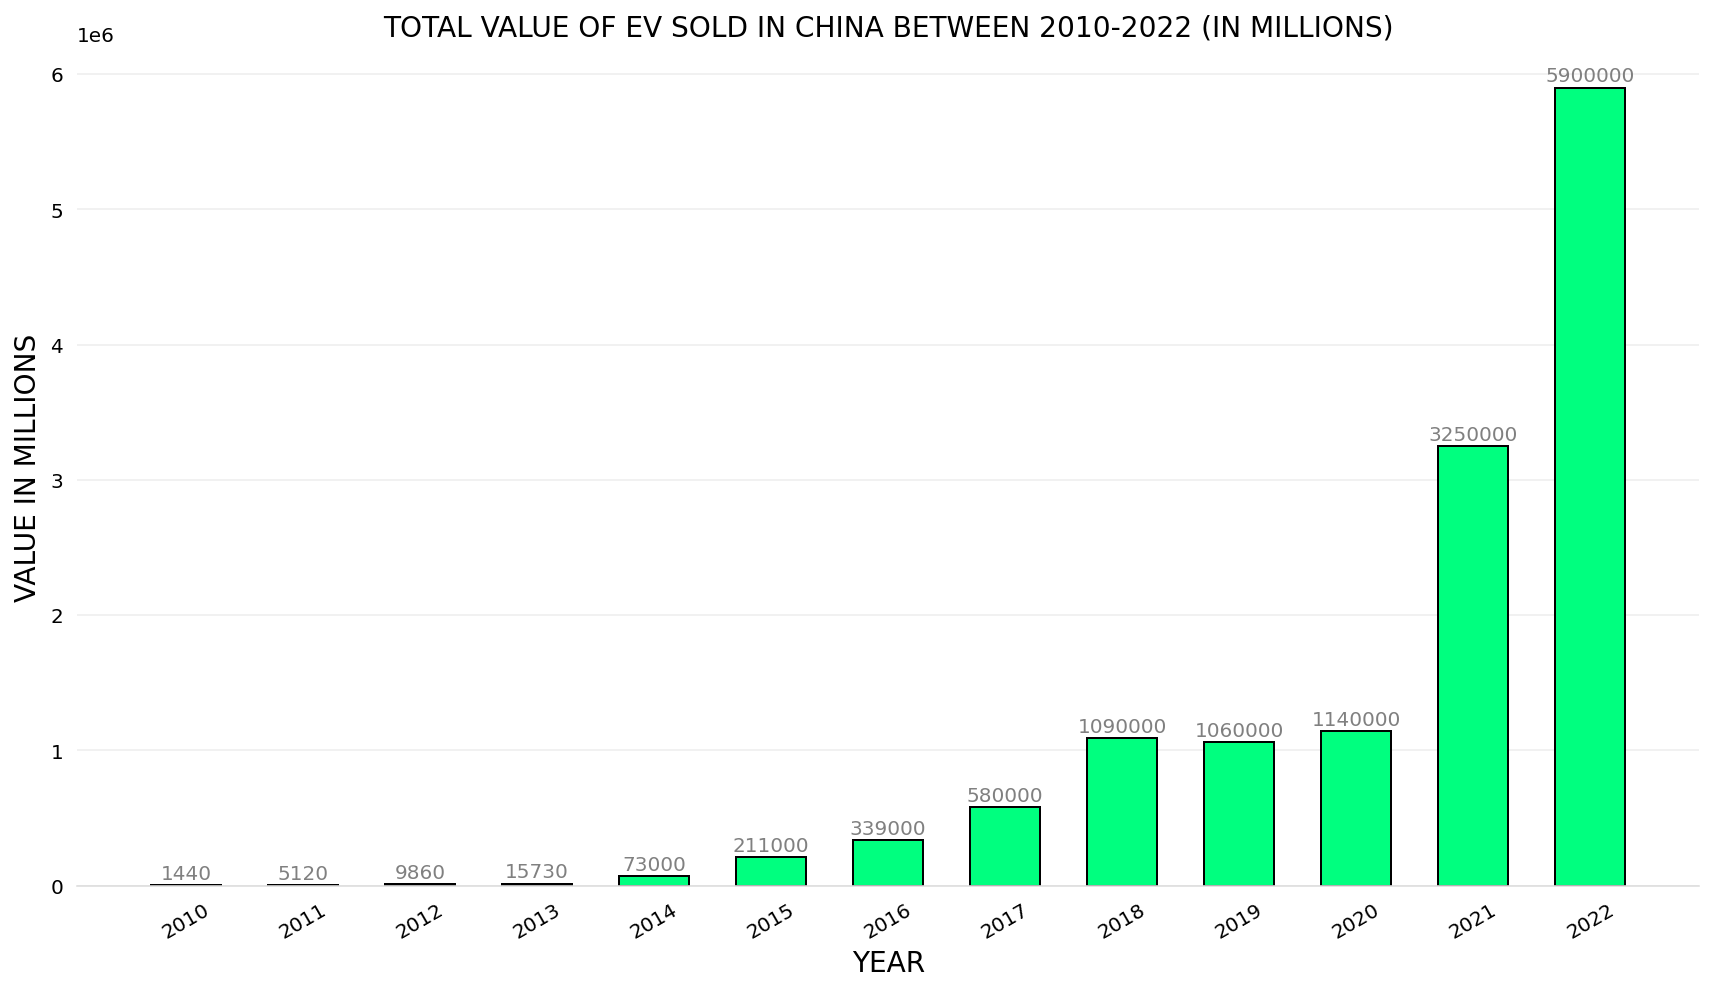

In [93]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.rc('font', family='Open Sans')
fig, ax = plt.subplots()
def autolabel(rectangle_group): # function for display bar heights which is annotation
    for rect in rectangle_group:
        height=rect.get_height()
        ax.annotate(str(height), # to get the height of bar or basically values of y-axis.
                    xy=(rect.get_x()+rect.get_width()/2,height), # to get the x and y coordinates to print text.
                    ha='center', # to align the text at center of the bar
                    xytext=(0,3), # to put a space between bar and text, 0 is x axis and y is the distance btw bar and text.
                    textcoords='offset points', # text will not be shown without it.
                    color='grey')
rect=ax.bar(
    x=china_df.year,width=0.6,color='springgreen',edgecolor='black',
    height=china_df.value,
    tick_label=china_df.year
)
autolabel(rect)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
plt.xlabel("YEAR",fontsize=14)
plt.xticks(rotation=30)
tick_label=china_df.year
plt.ylabel("VALUE IN MILLIONS",fontsize=14)
plt.title("TOTAL VALUE OF EV SOLD IN CHINA BETWEEN 2010-2022 (IN MILLIONS)",fontsize=14)

fig.tight_layout()


# Conclusion: Chinese EV market is the much more attractive compared to India, USA and Australia.

In [94]:
# Filter the data to only include entries for EU27
eu27_data = df[df['region'] == 'EU27']

# Group the data by year and sum the units column for each year
eu27_data = eu27_data.groupby('year')['value'].sum()

# Create a new data frame with the aggregated data
eu27_df = pd.DataFrame({'year': eu27_data.index, 'value': eu27_data.values})

# Print the new data frame
change=eu27_df['value'].pct_change()*100
eu27_df["%_change"] = change
eu27_df

,year,value,%_change
0,2010,1409,NaN
1,2011,7080,402.484031
2,2012,19300,172.598870
3,2013,45000,133.160622
4,2014,56000,24.444444
5,2015,119000,112.500000
6,2016,118000,-0.840336
7,2017,170000,44.067797
8,2018,240000,41.176471
9,2019,390000,62.500000


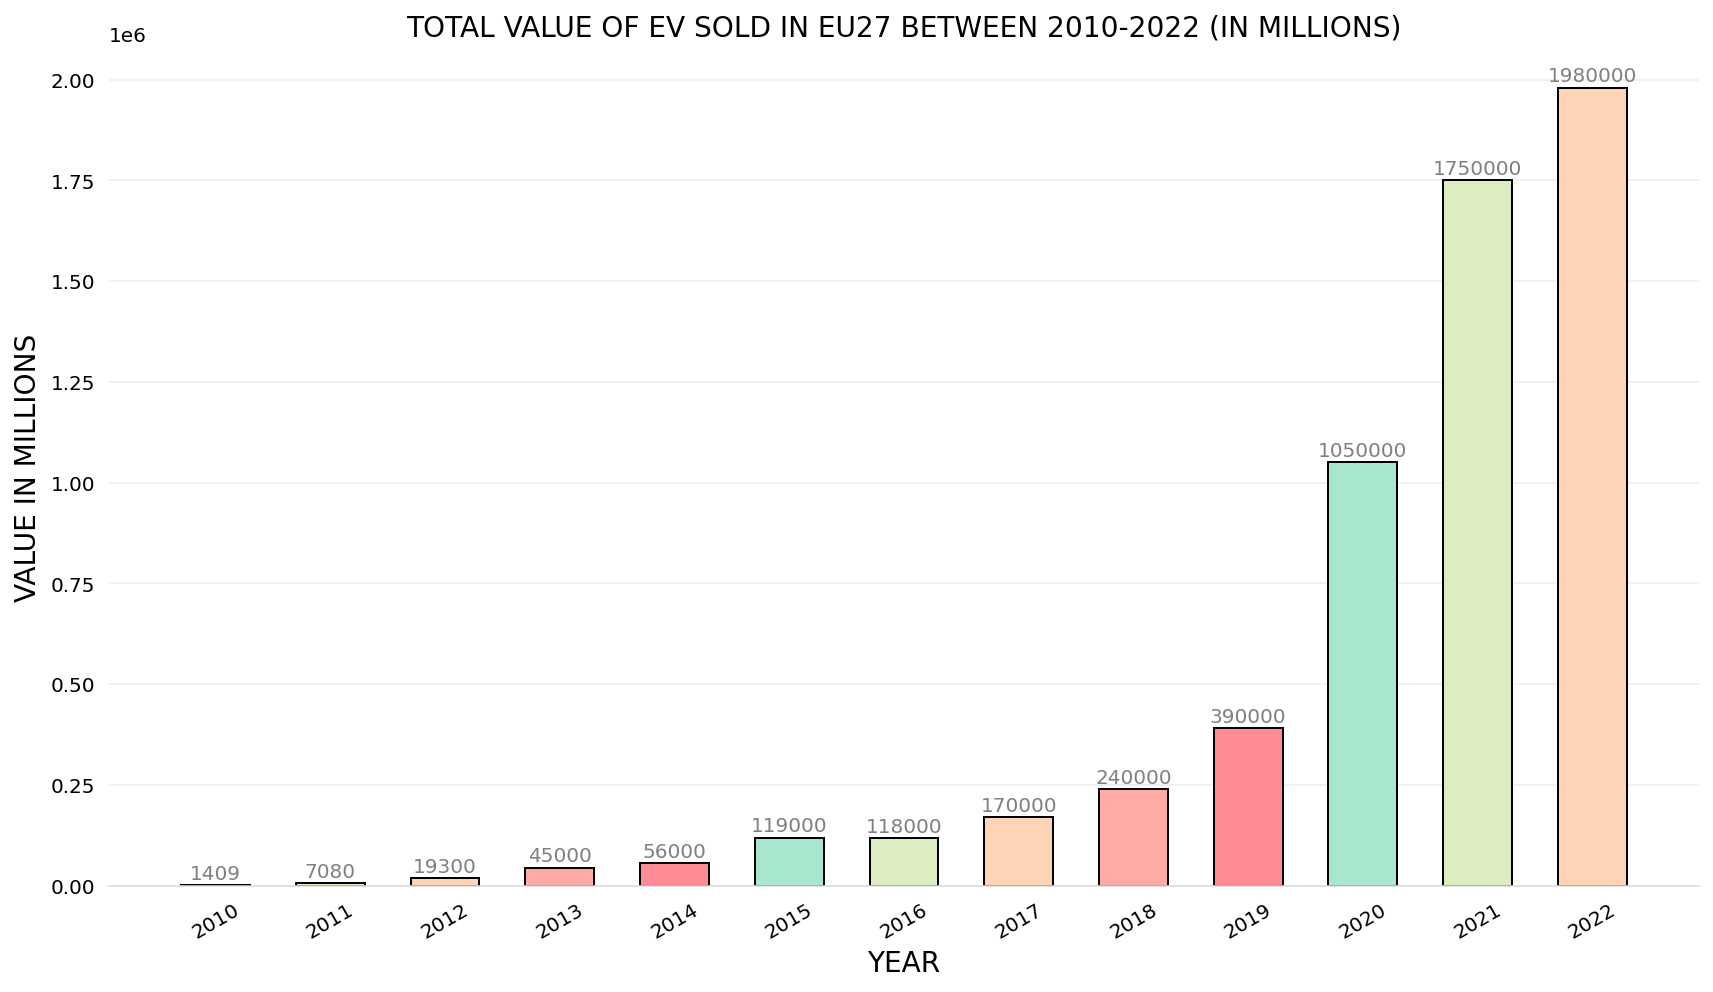

In [95]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.rc('font', family='Open Sans')
fig, ax = plt.subplots()
def autolabel(rectangle_group): # function for display bar heights which is annotation
    for rect in rectangle_group:
        height=rect.get_height()
        ax.annotate(str(height), # to get the height of bar or basically values of y-axis.
                    xy=(rect.get_x()+rect.get_width()/2,height), # to get the x and y coordinates to print text.
                    ha='center', # to align the text at center of the bar
                    xytext=(0,3), # to put a space between bar and text, 0 is x axis and y is the distance btw bar and text.
                    textcoords='offset points', # text will not be shown without it.
                    color='grey')
rect=ax.bar(
    x=eu27_df.year,width=0.6,color=colour1,edgecolor='black',
    height=eu27_df.value,
    tick_label=eu27_df.year
)
autolabel(rect)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
plt.xlabel("YEAR",fontsize=14)
plt.xticks(rotation=30)
tick_label=eu27_df.year
plt.ylabel("VALUE IN MILLIONS",fontsize=14)
plt.title("TOTAL VALUE OF EV SOLD IN EU27 BETWEEN 2010-2022 (IN MILLIONS)",fontsize=14)

fig.tight_layout()


# Conclusion: EV sales in 27 countries of european union shows a significant increase in EV sales over the past decade.

In [96]:
# Filter the data to only include entries for United Kingdom
uk_data = df[df['region'] == 'United Kingdom']

# Group the data by year and sum the units column for each year
uk_data = uk_data.groupby('year')['value'].sum()

# Create a new data frame with the aggregated data
uk_df = pd.DataFrame({'year': uk_data.index, 'value': uk_data.values})

# Print the new data frame
change=uk_df['value'].pct_change()*100
uk_df["%_change"] = change
uk_df

,year,value,%_change
0,2010,261,NaN
1,2011,1207,362.452107
2,2012,2570,112.924606
3,2013,3700,43.968872
4,2014,14500,291.891892
5,2015,29000,100.000000
6,2016,39000,34.482759
7,2017,49000,25.641026
8,2018,62000,26.530612
9,2019,75000,20.967742


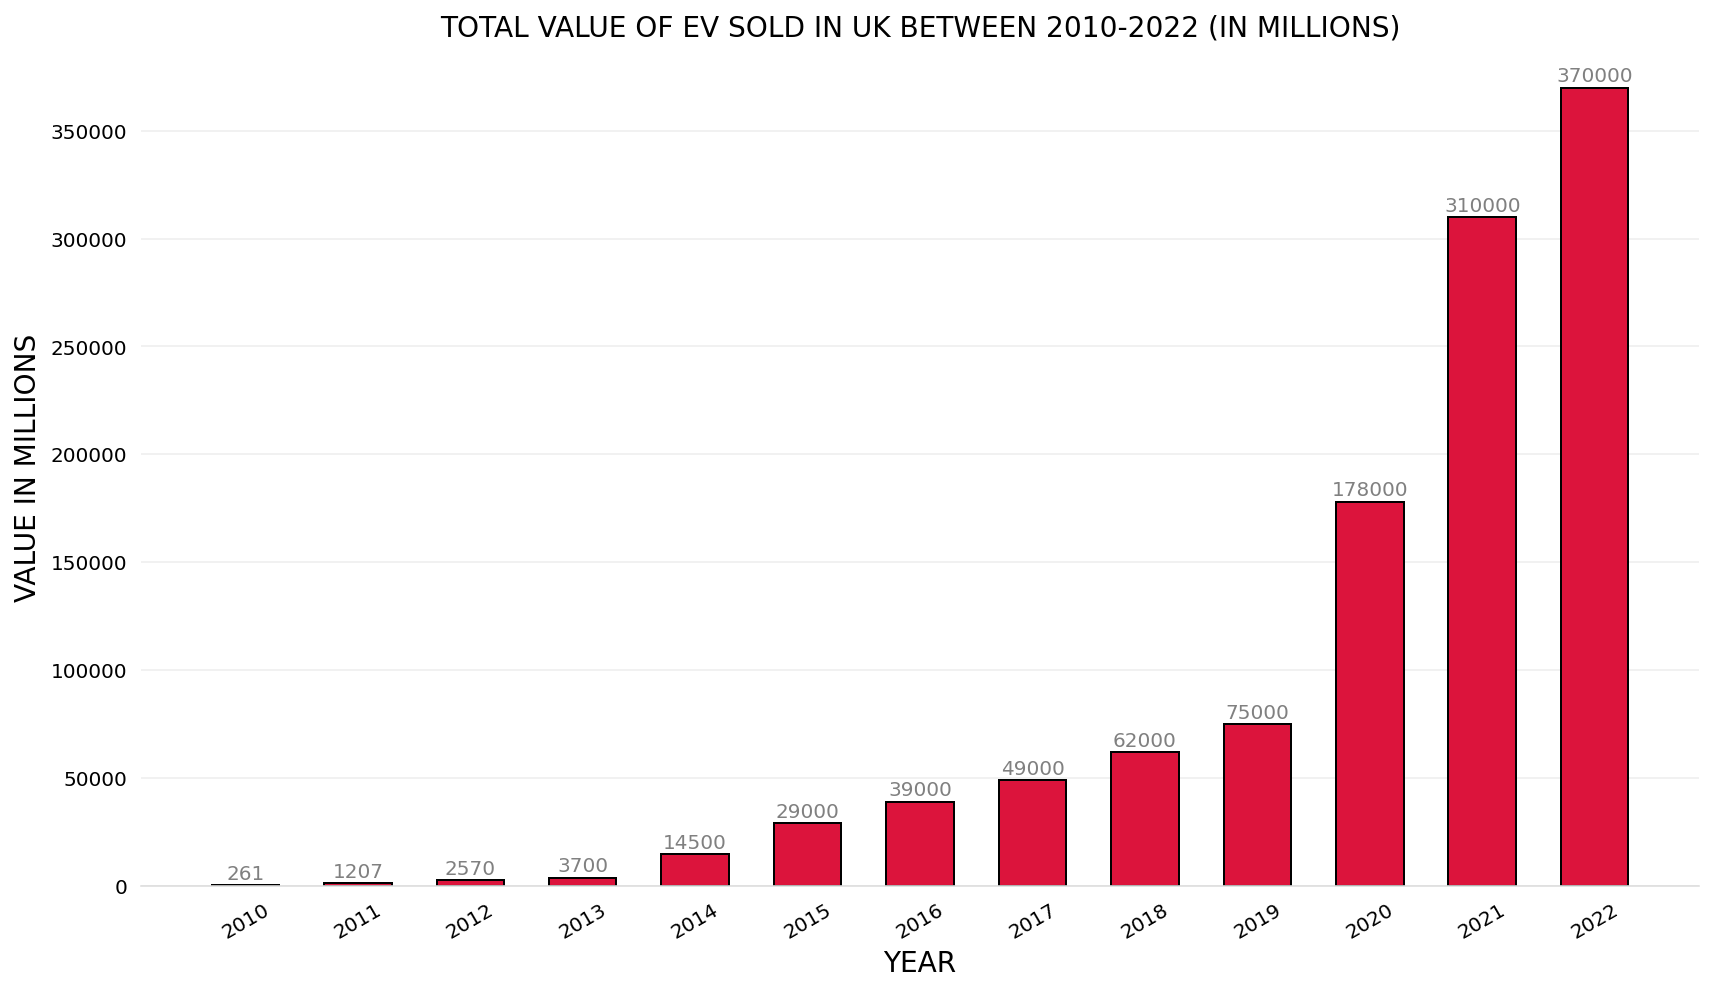

In [97]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.rc('font', family='Open Sans')
fig, ax = plt.subplots()
def autolabel(rectangle_group): # function for display bar heights which is annotation
    for rect in rectangle_group:
        height=rect.get_height()
        ax.annotate(str(height), # to get the height of bar or basically values of y-axis.
                    xy=(rect.get_x()+rect.get_width()/2,height), # to get the x and y coordinates to print text.
                    ha='center', # to align the text at center of the bar
                    xytext=(0,3), # to put a space between bar and text, 0 is x axis and y is the distance btw bar and text.
                    textcoords='offset points', # text will not be shown without it.
                    color='grey')
rect=ax.bar(
    x=uk_df.year,width=0.6,color='crimson',edgecolor='black',
    height=uk_df.value,
    tick_label=uk_df.year
)
autolabel(rect)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
plt.xlabel("YEAR",fontsize=14)
plt.xticks(rotation=30)
tick_label=uk_df.year
plt.ylabel("VALUE IN MILLIONS",fontsize=14)
plt.title("TOTAL VALUE OF EV SOLD IN UK BETWEEN 2010-2022 (IN MILLIONS)",fontsize=14)

fig.tight_layout()

# Conclusion: UK have become a big EV market in the past three years.

In [98]:
# Filter the data to only include entries for Europe
europe_data = df[df['region'] == 'Europe']

# Group the data by year and sum the units column for each year
europe_data = europe_data.groupby('year')['value'].sum()

# Create a new data frame with the aggregated data
europe_df = pd.DataFrame({'year': europe_data.index, 'value': europe_data.values})

# Print the new data frame
change=europe_df['value'].pct_change()*100
europe_df["%_change"] = change
europe_df

,year,value,%_change
0,2010,2030,NaN
1,2011,10430,413.793103
2,2012,27000,158.868648
3,2013,59000,118.518519
4,2014,96000,62.711864
5,2015,188000,95.833333
6,2016,212000,12.765957
7,2017,300000,41.509434
8,2018,390000,30.000000
9,2019,570000,46.153846


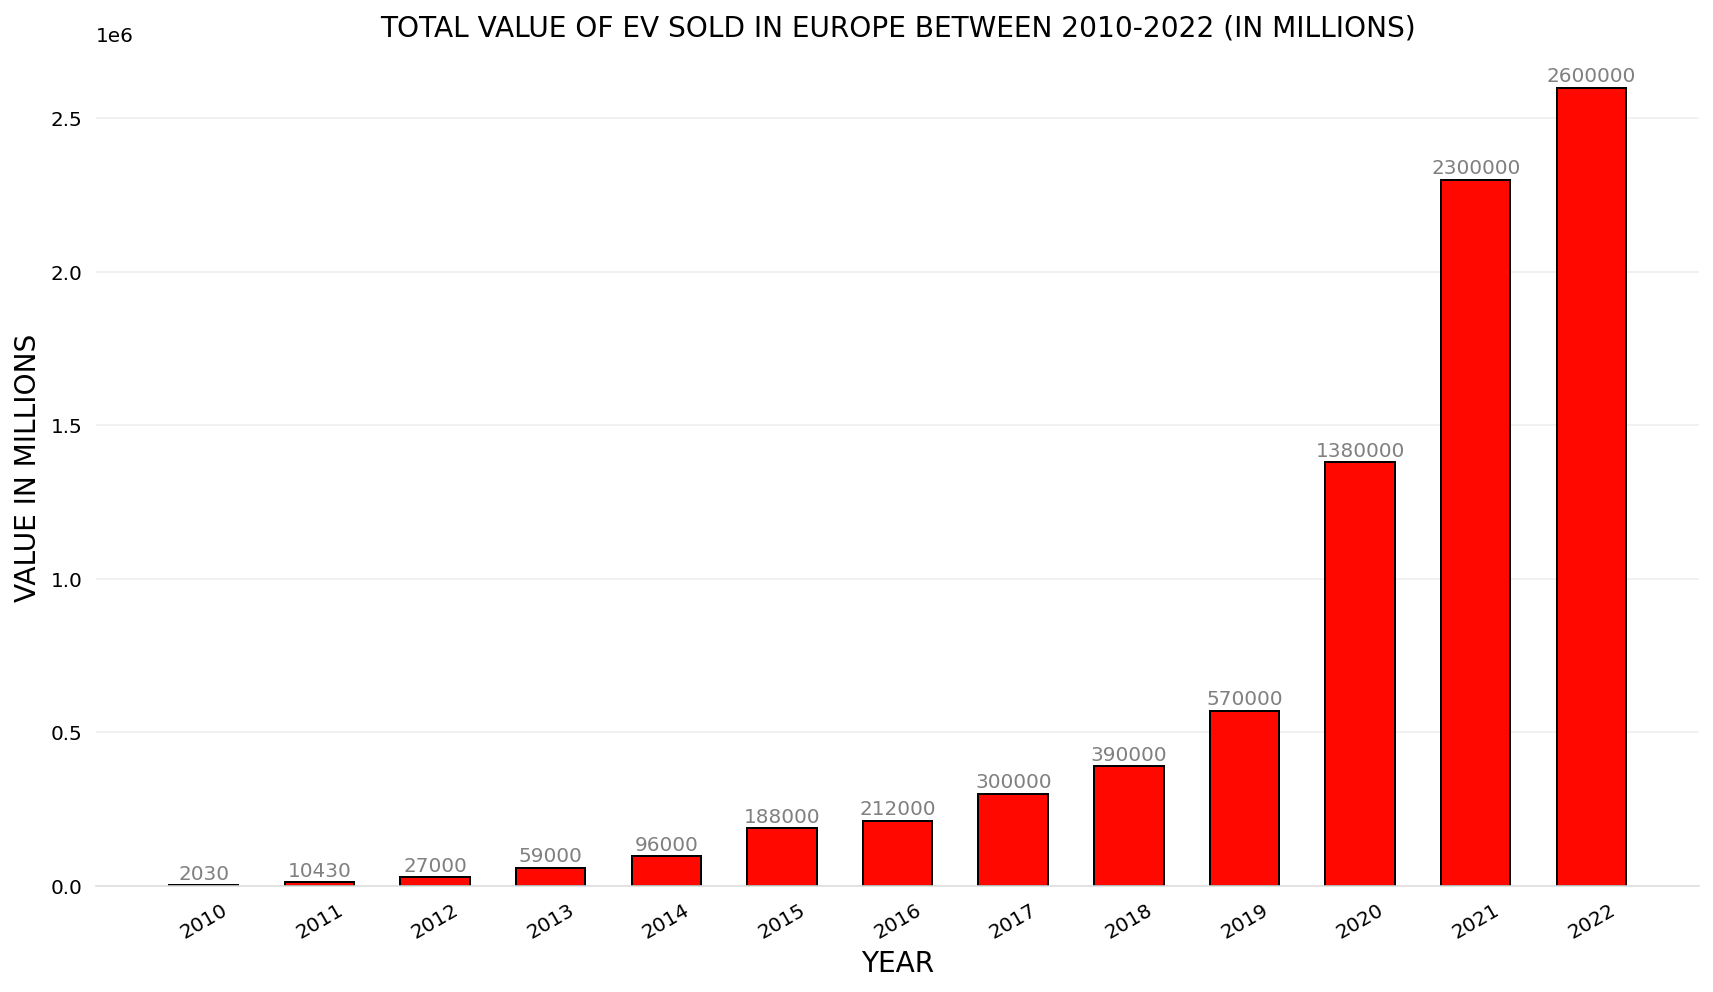

In [99]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.rc('font', family='Open Sans')
fig, ax = plt.subplots()
def autolabel(rectangle_group): # function for display bar heights which is annotation
    for rect in rectangle_group:
        height=rect.get_height()
        ax.annotate(str(height), # to get the height of bar or basically values of y-axis.
                    xy=(rect.get_x()+rect.get_width()/2,height), # to get the x and y coordinates to print text.
                    ha='center', # to align the text at center of the bar
                    xytext=(0,3), # to put a space between bar and text, 0 is x axis and y is the distance btw bar and text.
                    textcoords='offset points', # text will not be shown without it.
                    color='grey')
rect=ax.bar(
    x=europe_df.year,width=0.6,color='#ff0800',edgecolor='black',
    height=europe_df.value,
    tick_label=europe_df.year
)
autolabel(rect)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
plt.xlabel("YEAR",fontsize=14)
plt.xticks(rotation=30)
tick_label=europe_df.year
plt.ylabel("VALUE IN MILLIONS",fontsize=14)
plt.title("TOTAL VALUE OF EV SOLD IN EUROPE BETWEEN 2010-2022 (IN MILLIONS)",fontsize=14)

fig.tight_layout()

# Conclusion: Europe has made a significant growth in EV sales in the past decade.

In [100]:
# Filter the data to only include entries for Japan
japan_data = df[df['region'] == 'Japan']

# Group the data by year and sum the units column for each year
japan_data = japan_data.groupby('year')['value'].sum()

# Create a new data frame with the aggregated data
japan_df = pd.DataFrame({'year': japan_data.index, 'value': japan_data.values})

# Print the new data frame
change=japan_df['value'].pct_change()*100
japan_df["%_change"] = change
japan_df

,year,value,%_change
0,2010,2400,NaN
1,2011,13015,442.291667
2,2012,24000,84.402612
3,2013,29000,20.833333
4,2014,32000,10.344828
5,2015,24000,-25.000000
6,2016,24400,1.666667
7,2017,54000,121.311475
8,2018,50000,-7.407407
9,2019,39000,-22.000000


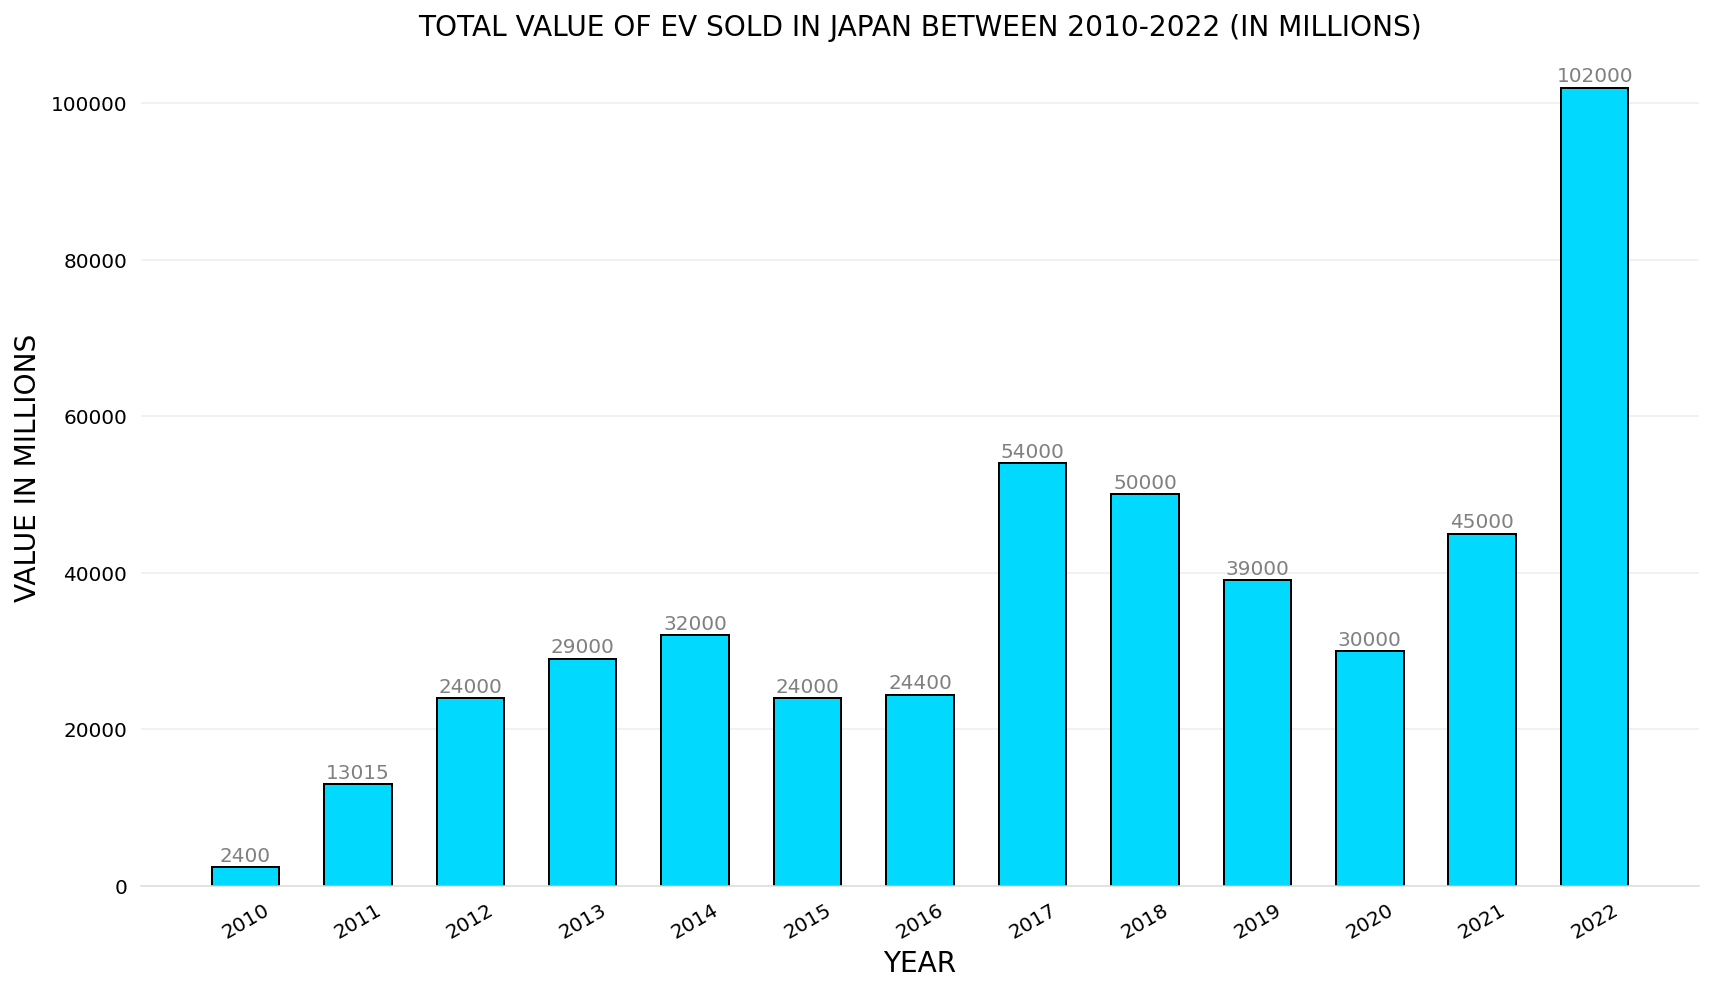

In [101]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.rc('font', family='Open Sans')
fig, ax = plt.subplots()
def autolabel(rectangle_group): # function for display bar heights which is annotation
    for rect in rectangle_group:
        height=rect.get_height()
        ax.annotate(str(height), # to get the height of bar or basically values of y-axis.
                    xy=(rect.get_x()+rect.get_width()/2,height), # to get the x and y coordinates to print text.
                    ha='center', # to align the text at center of the bar
                    xytext=(0,3), # to put a space between bar and text, 0 is x axis and y is the distance btw bar and text.
                    textcoords='offset points', # text will not be shown without it.
                    color='grey')
rect=ax.bar(
    x=japan_df.year,width=0.6,color='#01d9fe',edgecolor='black',
    height=japan_df.value,
    tick_label=japan_df.year
)
autolabel(rect)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
plt.xlabel("YEAR",fontsize=14)
plt.xticks(rotation=30)
tick_label=japan_df.year
plt.ylabel("VALUE IN MILLIONS",fontsize=14)
plt.title("TOTAL VALUE OF EV SOLD IN JAPAN BETWEEN 2010-2022 (IN MILLIONS)",fontsize=14)

fig.tight_layout()

# Conclusion: 2022 is the year in which most electric vehicles were sold.

In [102]:
# Filter the data to only include entries for Korea
korea_data = df[df['region'] == 'Korea']

# Group the data by year and sum the units column for each year
korea_data = korea_data.groupby('year')['value'].sum()

# Create a new data frame with the aggregated data
korea_df = pd.DataFrame({'year': korea_data.index, 'value': korea_data.values})

# Print the new data frame
change=korea_df['value'].pct_change()*100
korea_df["%_change"] = change
korea_df

,year,value,%_change
0,2010,61,NaN
1,2011,270,342.622951
2,2012,510,88.888889
3,2013,600,17.647059
4,2014,1300,116.666667
5,2015,3350,157.692308
6,2016,5030,50.149254
7,2017,14670,191.650099
8,2018,59400,304.907975
9,2019,35700,-39.898990


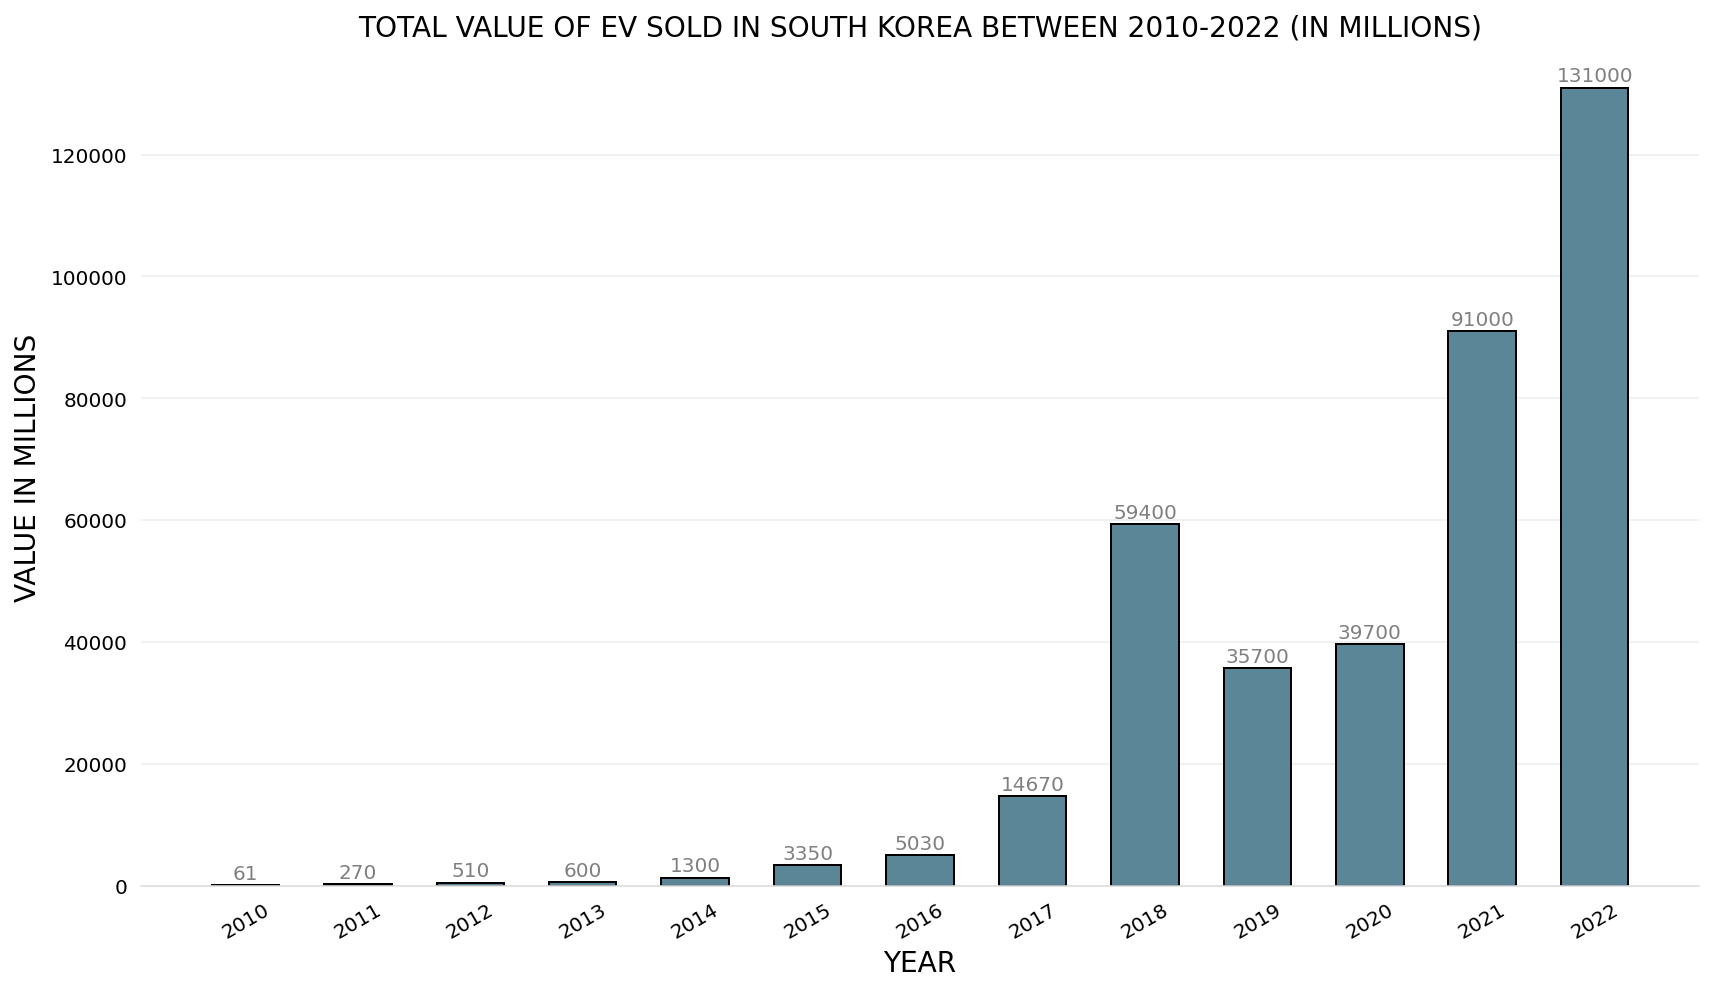

In [103]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.rc('font', family='Open Sans')
fig, ax = plt.subplots()
def autolabel(rectangle_group): # function for display bar heights which is annotation
    for rect in rectangle_group:
        height=rect.get_height()
        ax.annotate(str(height), # to get the height of bar or basically values of y-axis.
                    xy=(rect.get_x()+rect.get_width()/2,height), # to get the x and y coordinates to print text.
                    ha='center', # to align the text at center of the bar
                    xytext=(0,3), # to put a space between bar and text, 0 is x axis and y is the distance btw bar and text.
                    textcoords='offset points', # text will not be shown without it.
                    color='grey')
rect=ax.bar(
    x=korea_df.year,width=0.6,color='#5B8697',edgecolor='black',
    height=korea_df.value,
    tick_label=korea_df.year
)
autolabel(rect)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
plt.xlabel("YEAR",fontsize=14)
plt.xticks(rotation=30)
tick_label=korea_df.year
plt.ylabel("VALUE IN MILLIONS",fontsize=14)
plt.title("TOTAL VALUE OF EV SOLD IN SOUTH KOREA BETWEEN 2010-2022 (IN MILLIONS)",fontsize=14)

fig.tight_layout()

# Conclusion: Most of the EVs sold in South Korea were sold between 2018-2022. 

# Analyzing EV sales data of the world

In [104]:
# Filter the data to only include entries for World
world_data = df[df['region'] == 'World']

# Group the data by year and sum the units column for each year
world_data = world_data.groupby('year')['value'].sum()

# Create a new data frame with the aggregated data
world_df = pd.DataFrame({'year': world_data.index, 'value': world_data.values})

# Print the new data frame
change=world_df['value'].pct_change()*100
world_df["%_change"] = change
world_df

,year,value,%_change
0,2010,7570,NaN
1,2011,48000,534.081902
2,2012,118000,145.833333
3,2013,201000,70.338983
4,2014,330000,64.179104
5,2015,550000,66.666667
6,2016,750000,36.363636
7,2017,1180000,57.333333
8,2018,2050000,73.728814
9,2019,2080000,1.463415


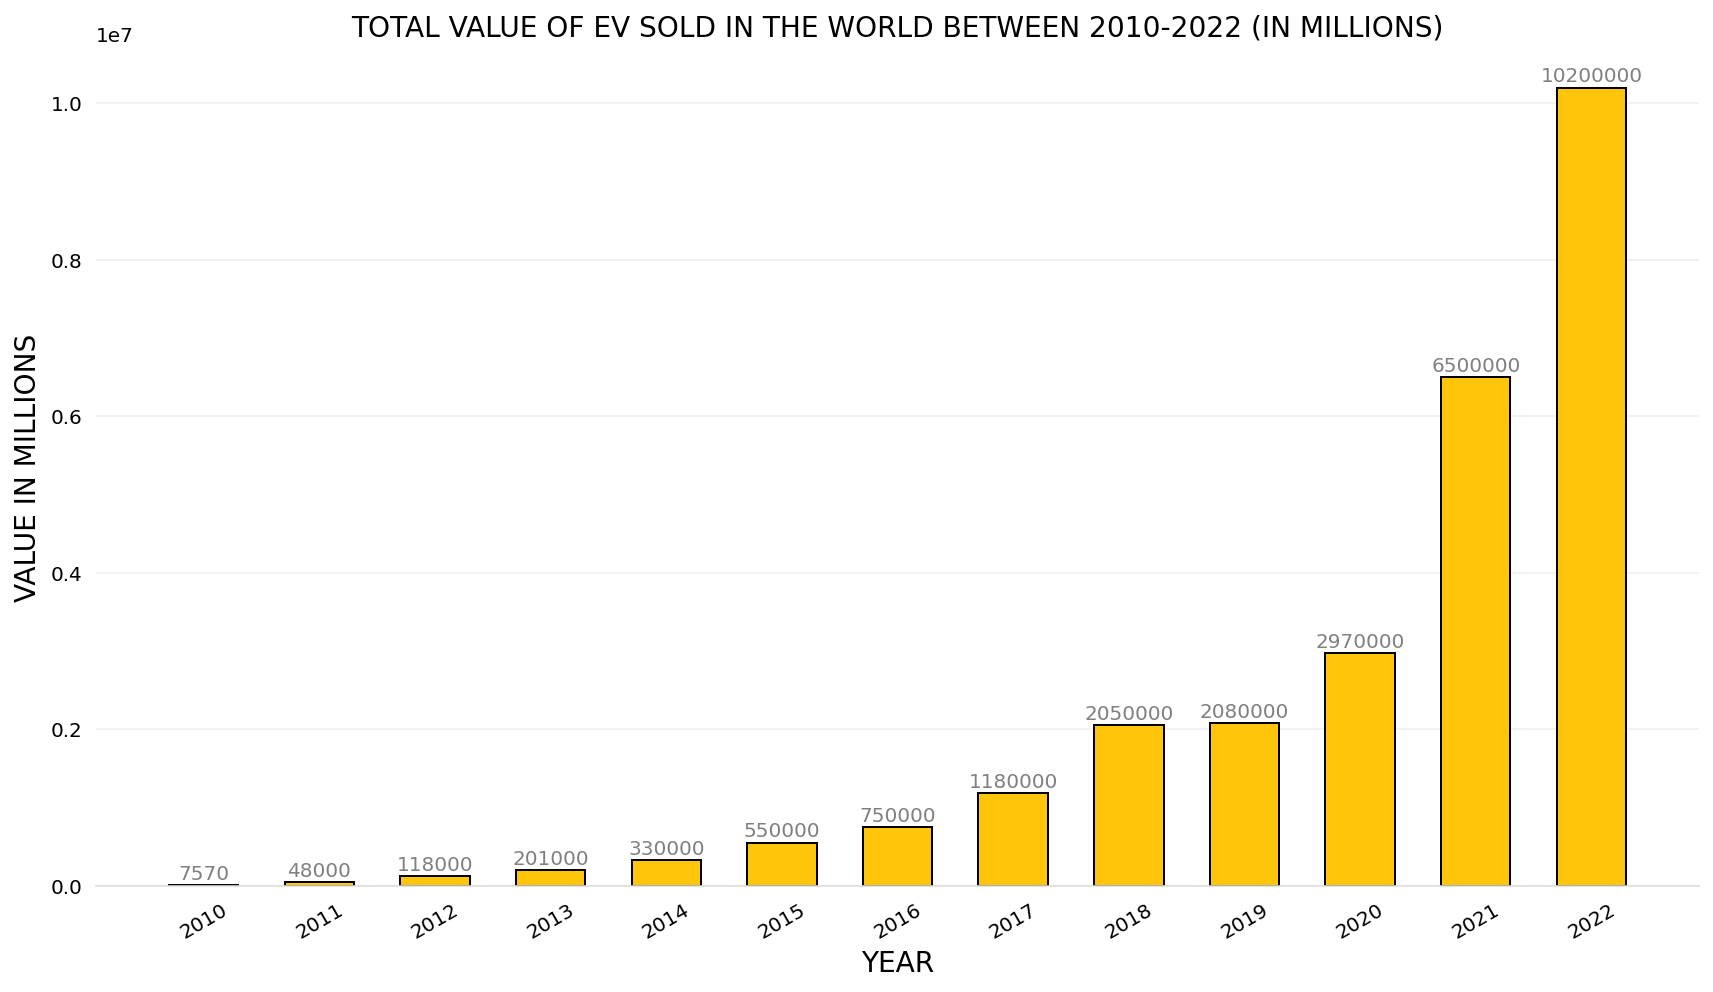

In [105]:
plt.rcParams['figure.figsize'] = (12, 7)
plt.rc('font', family='Open Sans')
fig, ax = plt.subplots()
def autolabel(rectangle_group): # function for display bar heights which is annotation
    for rect in rectangle_group:
        height=rect.get_height()
        ax.annotate(str(height), # to get the height of bar or basically values of y-axis.
                    xy=(rect.get_x()+rect.get_width()/2,height), # to get the x and y coordinates to print text.
                    ha='center', # to align the text at center of the bar
                    xytext=(0,3), # to put a space between bar and text, 0 is x axis and y is the distance btw bar and text.
                    textcoords='offset points', # text will not be shown without it.
                    color='grey')
rect=ax.bar(
    x=world_df.year,width=0.6,color='#FFC50B',edgecolor='black',
    height=world_df.value,
    tick_label=world_df.year
)
autolabel(rect)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
plt.xlabel("YEAR",fontsize=14)
plt.xticks(rotation=30)
tick_label=world_df.year
plt.ylabel("VALUE IN MILLIONS",fontsize=14)
plt.title("TOTAL VALUE OF EV SOLD IN THE WORLD BETWEEN 2010-2022 (IN MILLIONS)",fontsize=14)

fig.tight_layout()

# Conclusion: Electric vehicles are getting more and more popular among people.

In [106]:
# Add a new column to each dataframe indicating country name
australia_df = australia_df.assign(country="Australia")
usa_df = usa_df.assign(country="USA")
india_df = india_df.assign(country="India")
eu27_df = eu27_df.assign(country="EU27")
china_df = china_df.assign(country="China")
europe_df = europe_df.assign(country="Europe")
uk_df = uk_df.assign(country="United Kingdom")
japan_df = japan_df.assign(country="Japan")
korea_df = korea_df.assign(country="South Korea")
world_df = world_df.assign(country="Rest of the World")
# Concatenate individual dataframes
frames = [australia_df,usa_df, india_df,eu27_df,china_df,uk_df,europe_df,japan_df,korea_df,world_df] # list of individual dataframes
world_data = pd.concat(frames)
print(world_data)
# Group by country and compute sum of value column
grouped_df = world_data.groupby('country')['value'].sum().reset_index()
# Print resulting dataframe
print(grouped_df)


    year     value    %_change            country
0   2011        49         NaN          Australia
1   2012       250  410.204082          Australia
2   2013       290   16.000000          Australia
3   2014      1320  355.172414          Australia
4   2015      1760   33.333333          Australia
..   ...       ...         ...                ...
8   2018   2050000   73.728814  Rest of the World
9   2019   2080000    1.463415  Rest of the World
10  2020   2970000   42.788462  Rest of the World
11  2021   6500000  118.855219  Rest of the World
12  2022  10200000   56.923077  Rest of the World

[129 rows x 4 columns]
             country     value
0          Australia     86339
1              China  13675150
2               EU27   5945789
3             Europe   8134460
4              India     70373
5              Japan    468815
6  Rest of the World  26984570
7        South Korea    382591
8                USA   3355000
9     United Kingdom   1134238


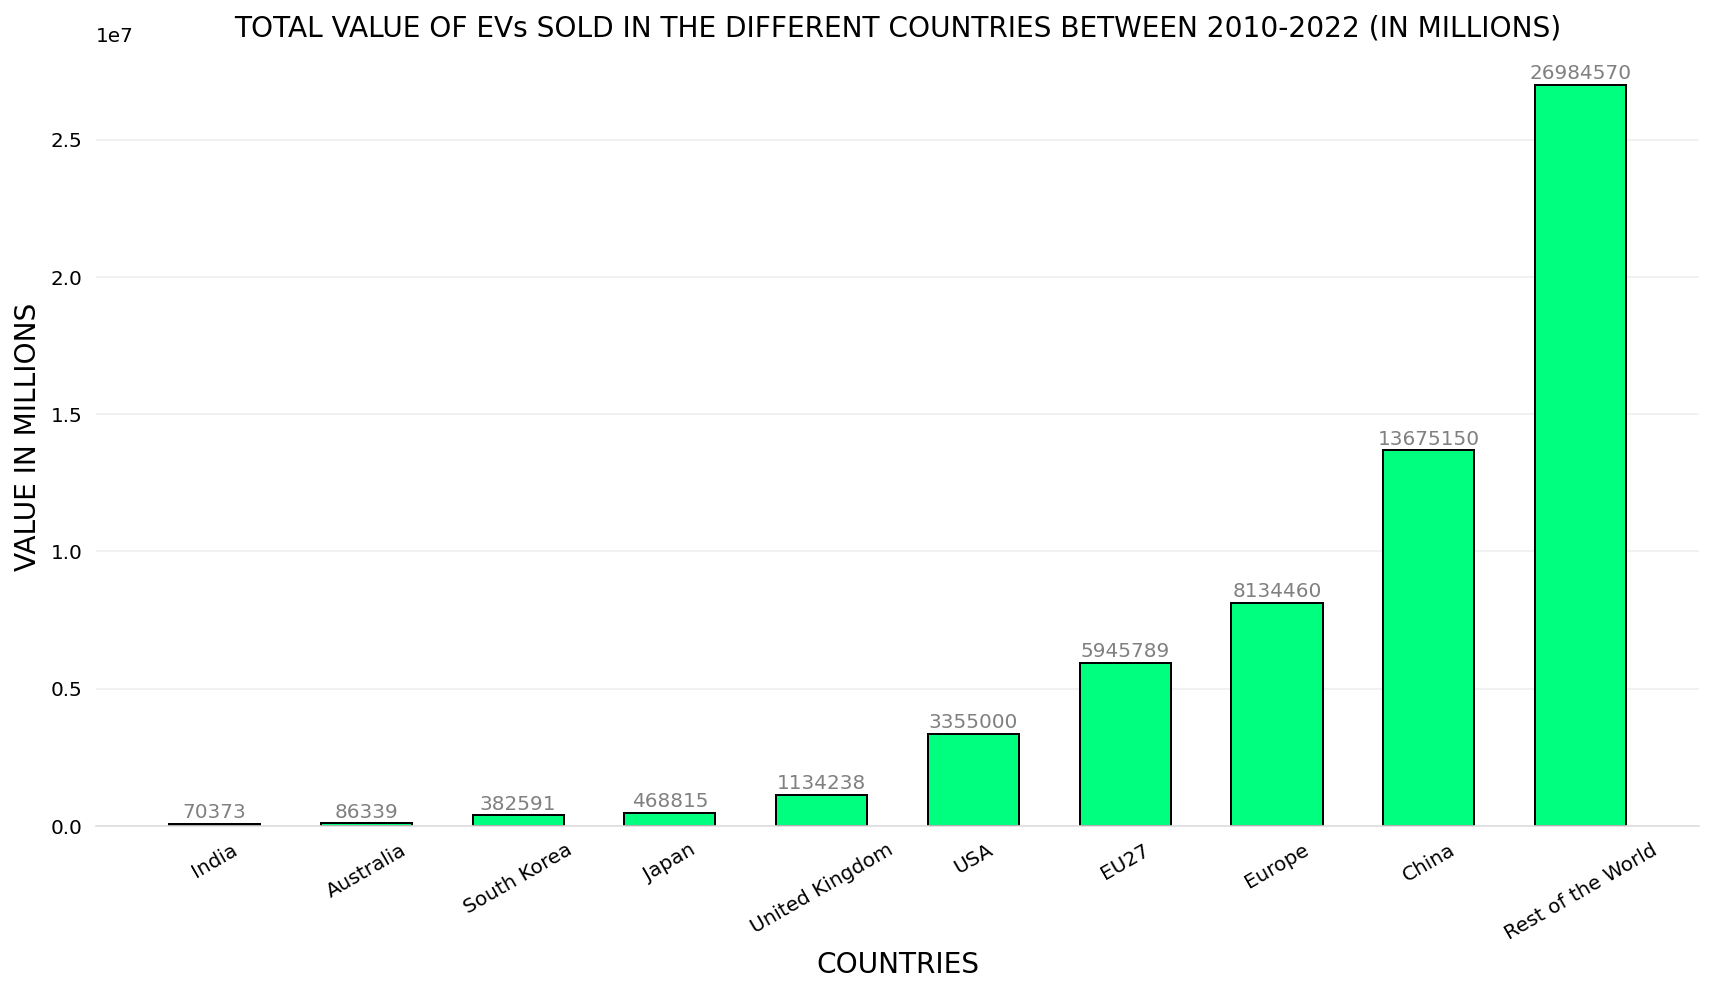

In [107]:
grouped_df=grouped_df.sort_values('value',ascending=True)
grouped_df.reset_index(inplace=True)
grouped_df=grouped_df.loc[0:10]
plt.rcParams['figure.figsize'] = (12, 7)
plt.rc('font', family='Open Sans')
fig, ax = plt.subplots()
def autolabel(rectangle_group): # function for display bar heights which is annotation
    for rect in rectangle_group:
        height=rect.get_height()
        ax.annotate(str(height), # to get the height of bar or basically values of y-axis.
                    xy=(rect.get_x()+rect.get_width()/2,height), # to get the x and y coordinates to print text.
                    ha='center', # to align the text at center of the bar
                    xytext=(0,3), # to put a space between bar and text, 0 is x axis and y is the distance btw bar and text.
                    textcoords='offset points', # text will not be shown without it.
                    color='grey')
rect=ax.bar(
    x=grouped_df.country,width=0.6,color='springgreen',edgecolor='black',
    height=grouped_df.value,
    tick_label=grouped_df.country
)
autolabel(rect)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
plt.xlabel("COUNTRIES",fontsize=14)
plt.xticks(rotation=30)
tick_label=world_df.country
plt.ylabel("VALUE IN MILLIONS",fontsize=14)
plt.title("TOTAL VALUE OF EVs SOLD IN THE DIFFERENT COUNTRIES BETWEEN 2010-2022 (IN MILLIONS)",fontsize=14)

fig.tight_layout()

# Conclusion: The above graph shows that China is the biggest EV market in the world followed by Europe, EU27, USA at 2nd, 3rd and 4th position.

In [108]:
uk_df.drop(['value'], axis=1,inplace=True)
usa_df.drop(['value'], axis=1,inplace=True)
japan_df.drop(['value'], axis=1,inplace=True)
korea_df.drop(['value'], axis=1,inplace=True)
india_df.drop(['value'], axis=1,inplace=True)
eu27_df.drop(['value'], axis=1,inplace=True)
europe_df.drop(['value'], axis=1,inplace=True)
australia_df.drop(['value'], axis=1,inplace=True)
china_df.drop(['value'], axis=1,inplace=True)
world_df.drop(['value'], axis=1,inplace=True)

In [109]:
data_frames = [uk_df,usa_df, japan_df, korea_df, india_df, eu27_df, europe_df, australia_df, china_df, world_df]

growth_merge = pd.concat([df.set_index('year') for df in data_frames], axis=1, join='outer')

print(growth_merge)
growth_merge.drop(['country'], axis=1,inplace=True)
print(growth_merge)

        %_change         country     %_change country    %_change country  \
year                                                                        
2010         NaN  United Kingdom          NaN     USA         NaN   Japan   
2011  362.452107  United Kingdom  1383.333333     USA  442.291667   Japan   
2012  112.924606  United Kingdom   203.370787     USA   84.402612   Japan   
2013   43.968872  United Kingdom    79.629630     USA   20.833333   Japan   
2014  291.891892  United Kingdom    21.649485     USA   10.344828   Japan   
2015  100.000000  United Kingdom    -3.389831     USA  -25.000000   Japan   
2016   34.482759  United Kingdom    40.350877     USA    1.666667   Japan   
2017   25.641026  United Kingdom    21.250000     USA  121.311475   Japan   
2018   26.530612  United Kingdom    85.567010     USA   -7.407407   Japan   
2019   20.967742  United Kingdom    -9.722222     USA  -22.000000   Japan   
2020  137.333333  United Kingdom    -9.538462     USA  -23.076923   Japan   

In [110]:
growth_merge.columns=['uk_growth','usa_growth', 'japan_growth','korea_growth','india_growth','eu27_growth',
                   'europe_growth','australia_growth','china_growth','world_growth']


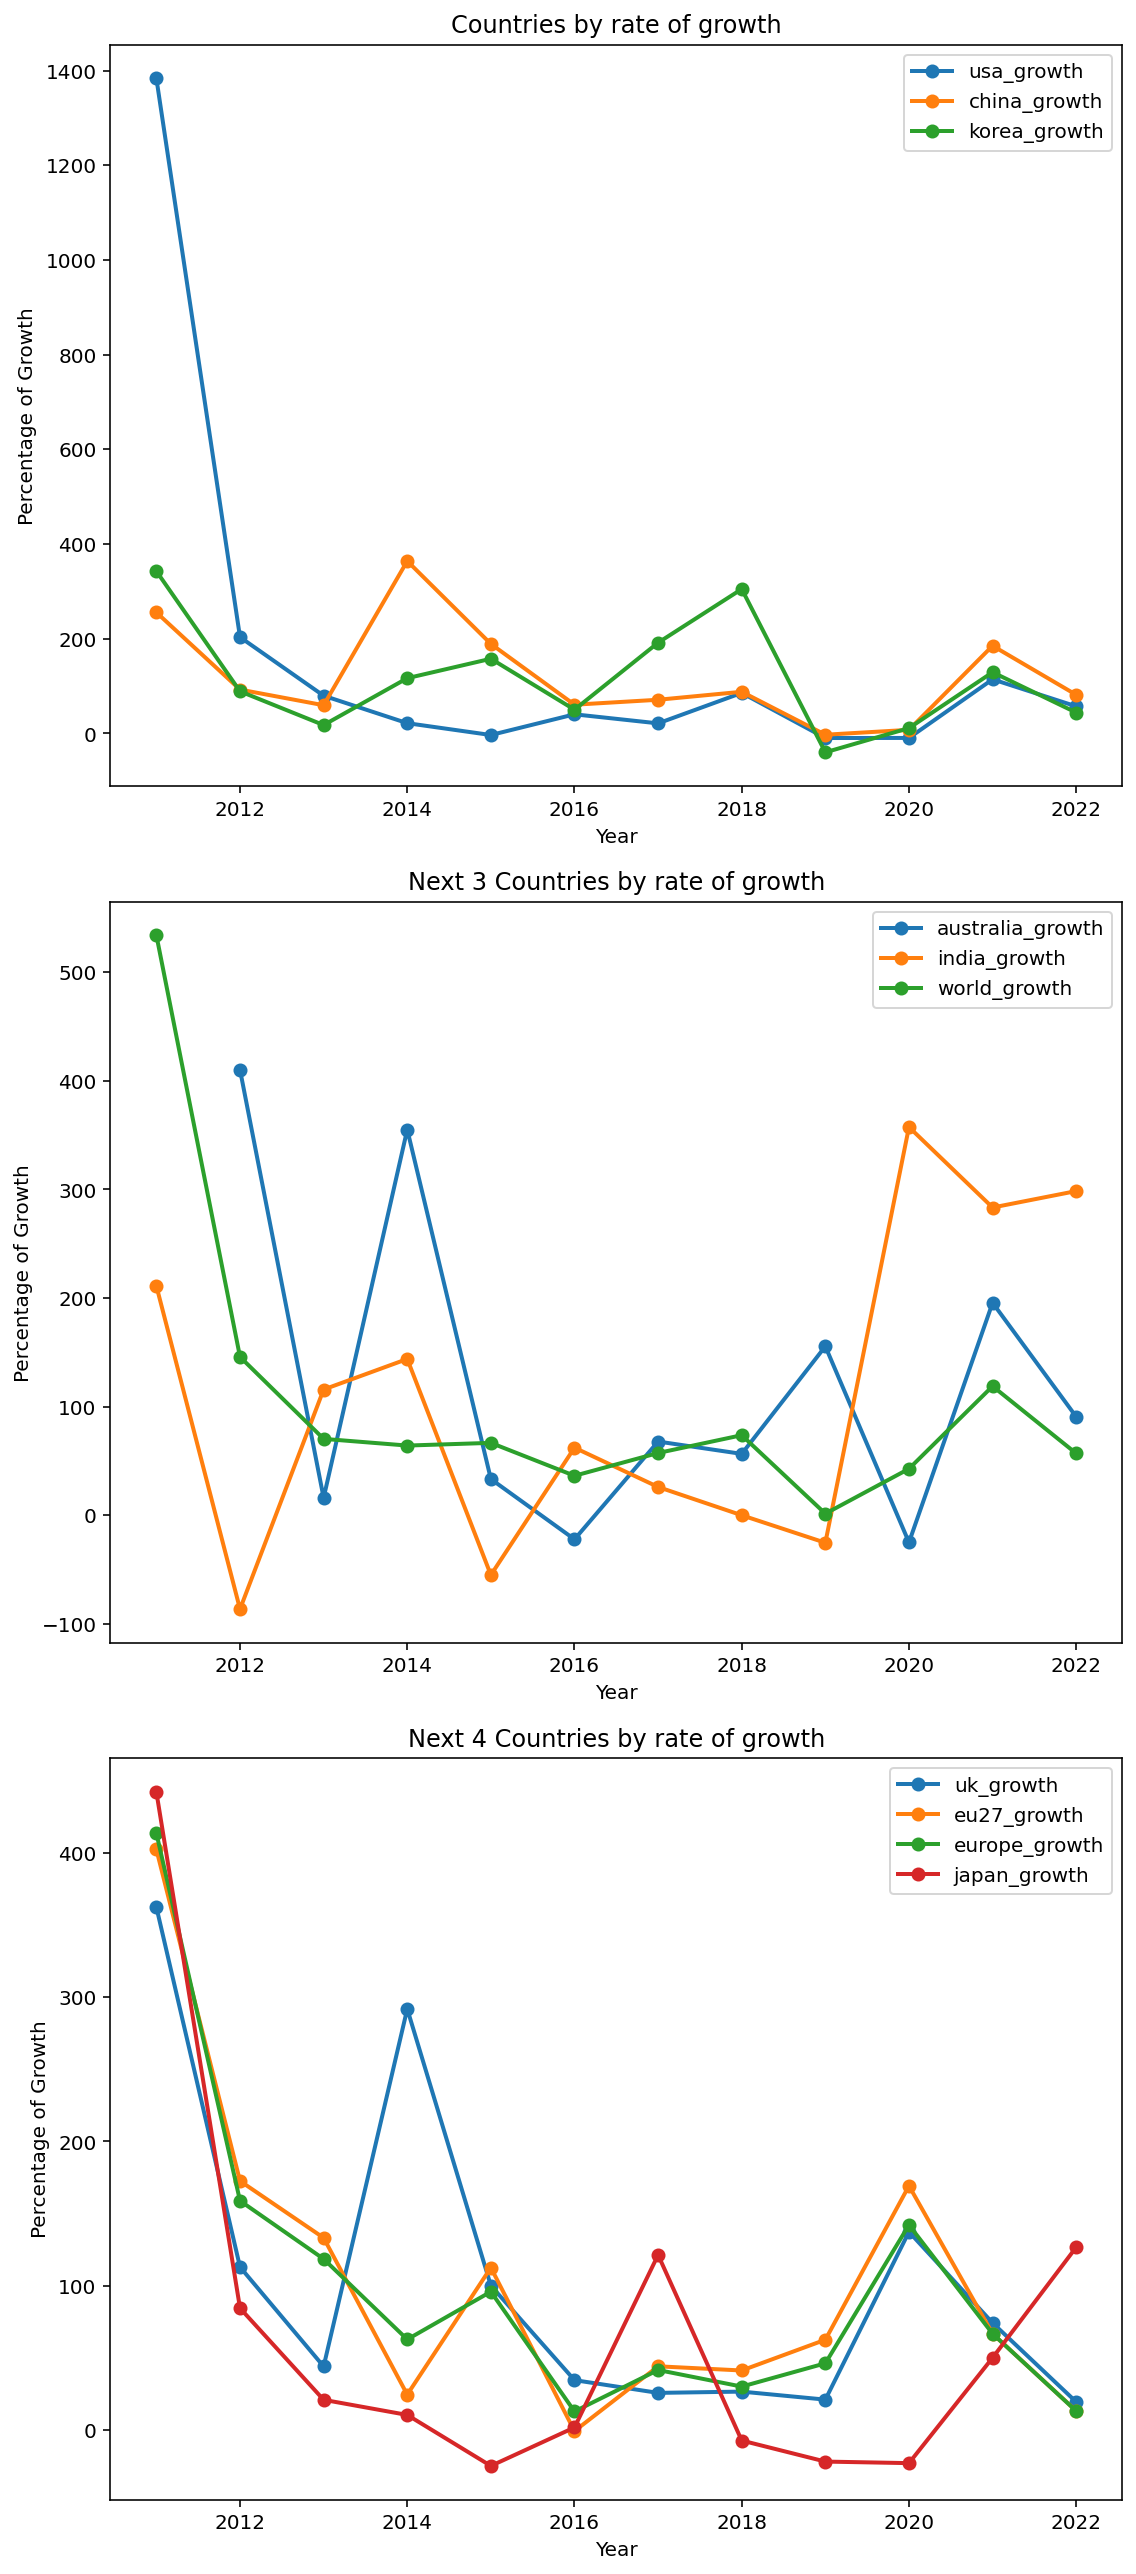

In [114]:
# Create a figure and subplots for the line charts
fig, axes = plt.subplots(3, 1, figsize=(8, 18))

# Plot the top 3 columns in a line chart with markers and increased line width
ax1 = axes[0]
growth_merge[top_cols].plot.line(ax=ax1, marker='o', linewidth=2)
ax1.set_title('Countries by rate of growth')
ax1.set_xlabel('Year')
ax1.set_ylabel('Percentage of Growth')

# Plot the next 3 columns in a separate line chart with markers and increased line width
ax2 = axes[1]
growth_merge[next_cols].plot.line(ax=ax2, marker='o', linewidth=2)
ax2.set_title('Next 3 Countries by rate of growth')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage of Growth')

# Plot the last 4 columns in a separate line chart with markers and increased line width
ax3 = axes[2]
growth_merge[last_cols].plot.line(ax=ax3, marker='o', linewidth=2)
ax3.set_title('Next 4 Countries by rate of growth')
ax3.set_xlabel('Year')
ax3.set_ylabel('Percentage of Growth')

plt.tight_layout()
plt.show()


# Conclusion: India showed the highest growth rate in EV sales in the past 3-4 years and Japan has the lowest overall growth rate in the past decade.
# World's rate of growth is on an average above 50% for the past decade.